In [1]:
# 필요한 라이브러리 설치
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

## 주어진 data (lendingclub_train.dta) 전처리

In [2]:
# 데이터 파일 불러오기
file_name = '/Users/limdonggeon/Desktop/SNU_FINTECH/Statics_DataScience_Statics/team_project/lendingclub_train.dta'
df = pd.read_stata(file_name)


In [3]:
df.shape


(874335, 334)

In [4]:
print(df.columns)


Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       ...
       'mths_since_recent_revol_delinq2', 'mths_since_recent_revol_delinq3',
       'mths_since_recent_revol_delinq4', 'mths_since_recent_revol_delinq5',
       'mths_since_recent_revol_delinq6', 'mths_since_recent_revol_delinq7',
       'mths_since_recent_revol_delinq8', 'mths_since_recent_revol_delinq9',
       'mths_since_recent_revol_delinq10', 'mths_since_recent_revol_delinq11'],
      dtype='object', length=334)


In [5]:
# 데이터 파일에서 돈을 벌어다 주는 loan_not_access 설정
df['loan_not_access'] = np.where(df['funded_amnt'] > df['total_pymnt'], 1, 0)
len(df[df['loan_not_access']==1])


/var/folders/fs/zfypqyv96hs22x794hfx0ycm0000gn/T/ipykernel_19735/2976678536.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['loan_not_access'] = np.where(df['funded_amnt'] > df['total_pymnt'], 1, 0)


122790

In [6]:
# 이상치라고 판단되는 값들 제거 ( EDA 총정리 코드에서 인덱스 확인 가능 )
new_df = df.copy()
delete_index = [331118, 829091, 474252, 733418]
for k in range(df.shape[0]):
    if df['index'].values[k] in delete_index:
        new_df = new_df.drop(k, axis=0)


In [7]:
# 원래 데이터에서 사전 변수라고 생각하는 데이터만 따로 뽑아 모델을 만들 데이터 셋 구축
df_data= new_df[['loan_not_access', 'loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'fico_range_low','pub_rec', 'revol_bal',
                 'revol_util', 'total_acc', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens',
                 'emp_length1', 'emp_length2', 'emp_length3', 'emp_length4', 'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8', 'emp_length9', 'emp_length10', 'emp_length11', 'emp_length12',
                 'home_ownership1', 'home_ownership2', 'home_ownership3', 'home_ownership4', 'home_ownership5', 'home_ownership6', 'verification_status1', 'verification_status2', 'verification_status3',
                 'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6', 'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11', 'purpose12', 'purpose13', 'purpose14',
                 'addr_state1', 'addr_state2', 'addr_state3', 'addr_state4', 'addr_state5', 'addr_state6', 'addr_state7', 'addr_state8', 'addr_state9', 'addr_state10',
                 'addr_state11', 'addr_state12', 'addr_state13', 'addr_state14', 'addr_state15', 'addr_state16', 'addr_state17', 'addr_state18', 'addr_state19', 'addr_state20',
                 'addr_state21', 'addr_state22', 'addr_state23', 'addr_state24', 'addr_state25', 'addr_state26', 'addr_state27', 'addr_state28', 'addr_state29', 'addr_state30',
                 'addr_state31', 'addr_state32', 'addr_state33', 'addr_state34', 'addr_state35', 'addr_state36', 'addr_state37', 'addr_state38', 'addr_state39', 'addr_state40',
                 'addr_state41', 'addr_state42', 'addr_state43', 'addr_state44', 'addr_state45', 'addr_state46', 'addr_state47', 'addr_state48', 'addr_state49', 'addr_state50',
                 'addr_state51', 'initial_list_status1', 'initial_list_status2', 'term1']]


In [8]:
# 모델의 정확도를 높이기 위해 0의 값을 갖는 비율이 0.3% 이하를 갖는 컬럼을 제거
for i in df_data.columns:
    if len(df_data[df_data[i] == 0])/len(df_data[i]) > 0.997:
        df_data = df_data.drop(i, axis=1)


In [9]:
df_data.columns


Index(['loan_not_access', 'loan_amnt', 'int_rate', 'annual_inc', 'dti',
       'delinq_2yrs', 'open_acc', 'fico_range_low', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies',
       'tax_liens', 'emp_length1', 'emp_length2', 'emp_length3', 'emp_length4',
       'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8',
       'emp_length9', 'emp_length10', 'emp_length11', 'emp_length12',
       'home_ownership2', 'home_ownership5', 'home_ownership6',
       'verification_status1', 'verification_status2', 'verification_status3',
       'purpose1', 'purpose2', 'purpose3', 'purpose5', 'purpose6', 'purpose7',
       'purpose8', 'purpose9', 'purpose10', 'purpose12', 'purpose13',
       'addr_state2', 'addr_state3', 'addr_state4', 'addr_state5',
       'addr_state6', 'addr_state7', 'addr_state10', 'addr_state11',
       'addr_state12', 'addr_state15', 'addr_state16', 'addr_stat

## 모델 : 로지스틱회귀 - penalty = None

In [10]:
# X와 y로 데이터 분리
X = df_data.drop('loan_not_access', axis=1)
y = df_data['loan_not_access']

# 전체 데이터셋을 train:validation:test 셋을 6:2:2로 분리
# 우선 전체 데이터를 train과 나머지로 분리 (train: 나머지 = 6:4)
X_train_1, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

# 나머지 데이터를 validation과 test로 분리 (validation: test = 1:1)
X_val_1, X_test_1, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)


# 수치형 변수들만 scaling 필요
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'fico_range_low',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens']

# 수치형 데이터 scaling
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train_1[numerical_cols])
X_val_numeric = scaler.transform(X_val_1[numerical_cols])            # train set과 scaling 똑같이 적용
X_test_numeric = scaler.transform(X_test_1[numerical_cols])          # train set과 scaling 똑같이 적용

# 더미변수도 추가해 train, validatiaon, test 데이터 셋 구성 다시하기
X_train = np.hstack((X_train_numeric, X_train_1.drop(numerical_cols, axis = 1)))
X_val = np.hstack((X_val_numeric, X_val_1.drop(numerical_cols, axis = 1)))
X_test = np.hstack((X_test_numeric, X_test_1.drop(numerical_cols, axis = 1)))


In [30]:
# 나눈 데이터 셋 크기 확인
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((524598, 88), (174866, 88), (174867, 88), (524598,), (174866,), (174867,))

In [12]:
# 로지스틱회귀 (penalty=None) 모델 생성
logreg_model = LogisticRegression(penalty=None, solver='saga', random_state=0, max_iter = 10000)

# train data에 대한 모델 훈련
logreg_model.fit(X_train, y_train)


LogisticRegression(max_iter=10000, penalty=None, random_state=0, solver='saga')

In [13]:
# Validataion set을 사용해 Parameter (threshold) 찾기
# Risk( = ( fpr*0.86*0.18 + (1-tpr)*0.14*0.44 ) )가 값에 최소가 되게하는 optimal threshold 찾기

# Validation set에 모델 적용
y_pred = logreg_model.predict_proba(X_val)[:, 1]

# ROC curve 값들 계산
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

# Risk가 최소값이 되는 threshold 찾기
min_revenue_risk = np.min(fpr * 0.86 * 0.18 + (1-tpr) * 0.44 * 0.14)
optimal_thresholds = thresholds[np.argmin(fpr * 0.86 * 0.18 + (1-tpr) * 0.44 * 0.14)]
print(min_revenue_risk)
print(optimal_thresholds)

0.06034688550002829
0.32322158106816584


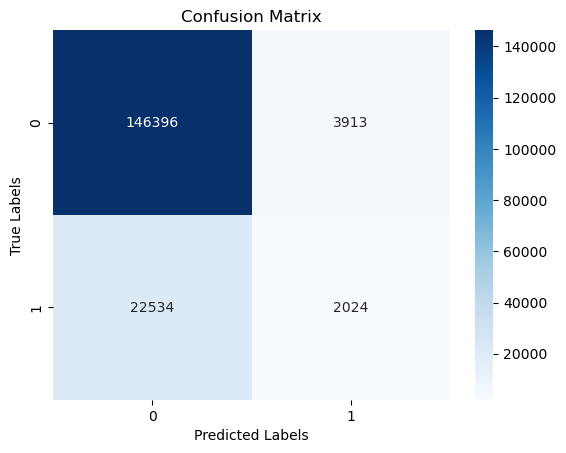

In [14]:
# Test set을 사용해 결과 확인

# Test set을 모델에 적용
y_pred1 = (logreg_model.predict_proba(X_test)[:, 1] > optimal_thresholds).astype(int)

# Test set을 모델에 적용시킨 결과 Confusion Matrix 그리기
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [35]:
# 모델의 평가 지표 확인

tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]

# accuracy, sensitivity, specificity, f1_score, revenue_risk
accuracy = (tn + tp)/(tn + fn + fp + tp)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp / (tp+fp)
recall = specificity
f1_score = 2*precision*recall / (precision + recall)
revenue_risk = fp*0.18 + fn*0.44

print('accuracy     : ', accuracy)
print('sensitivity  : ', sensitivity)
print('specificity  : ', specificity)
print('f1_score     : ', f1_score)
print('revenue_risk :', revenue_risk)


accuracy     :  0.848759342814825
sensitivity  :  0.08241713494584249
specificity  :  0.973966961392864
f1_score     :  0.5050467723428517
revenue_risk : 10619.300000000001


## 주어진 data (lendingclub_train.dta) 이익금 확인

In [15]:
# 이익금을 확인하기 위해 사후 변수들이 필요해 원래 데이터 파일 불러오기
file_name2 = '/Users/limdonggeon/Desktop/SNU_FINTECH/Statics_DataScience_Statics/team_project/lendingclub_train.dta'
df_all = pd.read_stata(file_name2)


In [16]:
# 전체 데이터셋에서
# 수익률, 총 받은 금액, 총 투자한 금액, 총 순이익
print(sum(df_all['total_pymnt'])/sum(df_all['funded_amnt']))
print(sum(df_all['total_pymnt']))
print(sum(df_all['funded_amnt']))
print(sum(df_all['total_pymnt']) - sum(df_all['funded_amnt']))


1.0908315080802833
13013512253.598719
11929901325
1083610928.5987186


In [17]:
# 테스트 데이터셋에서
# 수익률, 총 받은 금액, 총 투자한 금액, 총 순이익
df_test = df_all.loc[y_test.index]
print(sum(df_test['total_pymnt'])/sum(df_test['funded_amnt']))
print(sum(df_test['total_pymnt']))
print(sum(df_test['funded_amnt']))
print(sum(df_test['total_pymnt']) - sum(df_test['funded_amnt']))


1.0905922431935813
2596459846.307935
2380779675
215680171.30793524


In [18]:
# 테스트 데이터셋에서 모델링한 결과
# 수익률, 총 받은 금액, 총 투자한 금액, 총 순이익
df_test_loan_access = df_all.loc[y_test[y_pred1 == 0].index]
print(sum(df_test_loan_access['total_pymnt'])/sum(df_test_loan_access['funded_amnt']))
print(sum(df_test_loan_access['total_pymnt']))
print(sum(df_test_loan_access['funded_amnt']))
print(sum(df_test_loan_access['total_pymnt']) - sum(df_test_loan_access['funded_amnt']))


1.0909983231826754
2484241203.178515
2277034850
207206353.17851496


## Out of data (lendingclub_test.dta)  적용

In [20]:
# Out of Data 파일 불러오기
file_name_out_of_set = '/Users/limdonggeon/Desktop/SNU_FINTECH/Statics_DataScience_Statics/team_project/lendingclub_test.dta'
df_out_of_set = pd.read_stata(file_name_out_of_set)


In [21]:
df_out_of_set.shape

(218584, 334)

In [22]:
# Out of Data에서 돈을 벌어다 주는 loan_not_access 설정
df_out_of_set['loan_not_access'] = np.where(df_out_of_set['funded_amnt'] > df_out_of_set['total_pymnt'], 1, 0)
len(df_out_of_set[df_out_of_set['loan_not_access']==1])

/var/folders/fs/zfypqyv96hs22x794hfx0ycm0000gn/T/ipykernel_19735/2614212035.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_out_of_set['loan_not_access'] = np.where(df_out_of_set['funded_amnt'] > df_out_of_set['total_pymnt'], 1, 0)


30300

In [23]:
# 위의 데이터 셋에서 사용한 변수들만 사용
df_out_of_set2 = df_out_of_set[df_data.columns]


In [24]:
# Out of test를 
# X와 y로 데이터 분리
X_out = df_out_of_set2.drop('loan_not_access', axis=1)
y_out_test = df_out_of_set2['loan_not_access']

# 수치형 변수들만 scaling 필요
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'open_acc', 'fico_range_low',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens',]

# 수치형 변수들을 위 쪽의 train set과 똑같이 scaling 진행
X_out_numeric = scaler.transform(X_out[numerical_cols])         # train set과 scaling 똑같이 적용

# 더미변수도 추가해 Out of test 데이터 셋 구성 다시하기
X_out_test = np.hstack((X_out_numeric, X_out.drop(numerical_cols, axis = 1)))

4783


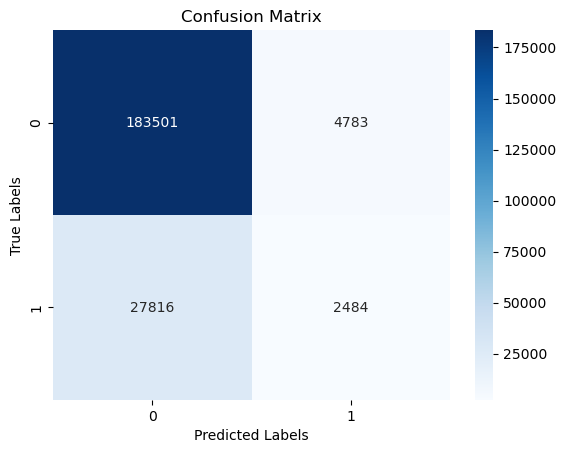

In [25]:
# Out of Test set을 모델에 적용
y_pred_out = (logreg_model.predict_proba(X_out_test)[:, 1] > optimal_thresholds).astype(int)

# Out of Test set을 모델에 적용시킨 결과 Confusion Matrix 그리기
cm_out = confusion_matrix(y_out_test, y_pred_out)
sns.heatmap(cm_out, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [33]:
# 모델의 평가 지표 확인

tn = cm_out[0][0]
fp = cm_out[0][1]
fn = cm_out[1][0]
tp = cm_out[1][1]

# accuracy, sensitivity, specificity, f1_score, revenue_risk
accuracy = (tn + tp)/(tn + fn + fp + tp)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
precision = tp / (tp+fp)
recall = specificity
f1_score = 2*precision*recall / (precision + recall)
revenue_risk = fp*0.18 + fn*0.44

print('accuracy     : ', accuracy)
print('sensitivity  : ', sensitivity)
print('specificity  : ', specificity)
print('f1_score     : ', f1_score)
print('revenue_risk :', revenue_risk)

accuracy     :  0.850862826190389
sensitivity  :  0.08198019801980198
specificity  :  0.9745968855558624
f1_score     :  0.5061255614365764
revenue_risk : 13099.980000000001


## Out of data (lendingclub_test.dta) 이익금 확인

In [26]:
# Out of data set에서
# 수익률, 총 받은 금액, 총 투자한 금액, 총 순이익

df_out_test = df_out_of_set.loc[y_out_test.index]
print(sum(df_out_test['total_pymnt'])/sum(df_out_test['funded_amnt']))
print(sum(df_out_test['total_pymnt']))
print(sum(df_out_test['funded_amnt']))
print(sum(df_out_test['total_pymnt']) - sum(df_out_test['funded_amnt']))

1.0914570361300966
3257320557.5768466
2984378175
272942382.5768466


In [27]:
# Out of data set에서 모델링한 결과
# 수익률, 총 받은 금액, 총 투자한 금액, 총 순이익

df_out_test_loan_access = df_out_of_set.loc[y_out_test[y_pred_out == 0].index]
print(sum(df_out_test_loan_access['total_pymnt'])/sum(df_out_test_loan_access['funded_amnt']))
print(sum(df_out_test_loan_access['total_pymnt']))
print(sum(df_out_test_loan_access['funded_amnt']))
print(sum(df_out_test_loan_access['total_pymnt']) - sum(df_out_test_loan_access['funded_amnt']))

1.0921188483075306
3121925096.9360685
2858594650
263330446.93606853
